# Deteccion del Cancer de Mama en la ciudad de Winsconsin
* El siguiente analisis predictivo usaremos heramientas de Machine learning para lograr detectar el Cancer
  de mama en funcion de sus carateristicas

## 1.Planteamiento del problema
* Obteneer un modelo de machine learning para hallar el cancer de mama a temprana edad

## 2. Metricas de evaluacion
* Al tratarse de un problema de clasificacion (Tal y como cataloga el repositorio UCI) usaremos metricas como **accuracy** ,**f1**,**recall**,**precision**. La mas importante es **f1** ya que tiene mejor desenvolvimiento con los datos desbalanceados, y orientacion en la metrica de falsos positivos. 

## 3. Preparacion de datos
### 3.1 Preprocesamiento de datos

In [115]:
%matplotlib inline
#cargamos los datos
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas_profiling import ProfileReport


In [116]:

names=['Sample-code-number','Clump-Thickness','USize','UShape','Marginal-adhesion','SingleEpSize','BareNuclei','BlandCh','NormalNucleoi','Mitoses','Class']

In [117]:
data=pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=names)

In [118]:
data.head()

,Sample-code-number,Clump-Thickness,USize,UShape,Marginal-adhesion,SingleEpSize,BareNuclei,BlandCh,NormalNucleoi,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [119]:
data.shape 

(699, 11)

In [120]:
data.describe() 

,Sample-code-number,Clump-Thickness,USize,UShape,Marginal-adhesion,SingleEpSize,BlandCh,NormalNucleoi,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [121]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sample-code-number  699 non-null    int64 
 1   Clump-Thickness     699 non-null    int64 
 2   USize               699 non-null    int64 
 3   UShape              699 non-null    int64 
 4   Marginal-adhesion   699 non-null    int64 
 5   SingleEpSize        699 non-null    int64 
 6   BareNuclei          699 non-null    object
 7   BlandCh             699 non-null    int64 
 8   NormalNucleoi       699 non-null    int64 
 9   Mitoses             699 non-null    int64 
 10  Class               699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [122]:
#veamos si hay nulos
data.isnull().sum()

Sample-code-number    0
Clump-Thickness       0
USize                 0
UShape                0
Marginal-adhesion     0
SingleEpSize          0
BareNuclei            0
BlandCh               0
NormalNucleoi         0
Mitoses               0
Class                 0
dtype: int64

In [123]:
#por suerte no hay nulos.
#pero detectaos que '?' es detectado como nulo
data.replace('?',np.nan,inplace=True)
#Entonces tenemosque ir a la exploracion de datos

In [124]:
data.isnull().sum() 

Sample-code-number     0
Clump-Thickness        0
USize                  0
UShape                 0
Marginal-adhesion      0
SingleEpSize           0
BareNuclei            16
BlandCh                0
NormalNucleoi          0
Mitoses                0
Class                  0
dtype: int64

In [125]:
#como son discretas lo remplazaremos por la moda, el valor mas frecuente
moda=data['BareNuclei'].mode()[0]
data['BareNuclei']=data['BareNuclei'].replace(np.nan,moda)

#y verificamos su asignacion
data.isnull().sum() 

Sample-code-number    0
Clump-Thickness       0
USize                 0
UShape                0
Marginal-adhesion     0
SingleEpSize          0
BareNuclei            0
BlandCh               0
NormalNucleoi         0
Mitoses               0
Class                 0
dtype: int64

In [126]:
data.duplicated().sum()

9

In [127]:
len(data['Sample-code-number'].unique())

645

In [128]:
#La prescencia de valores duplicados se realiza en la exploracion de datos como luego de la seleccion de caracteriticas : Ojo. Importante
data.drop_duplicates(inplace=True) 

In [129]:
#una vez borrado los elementos redundantes
#debido a que nos nos muestra el codigo del numero de muestra 'Sample-code-number'

In [130]:
data.shape 

(690, 11)

### 3.2 Exploracion de datos

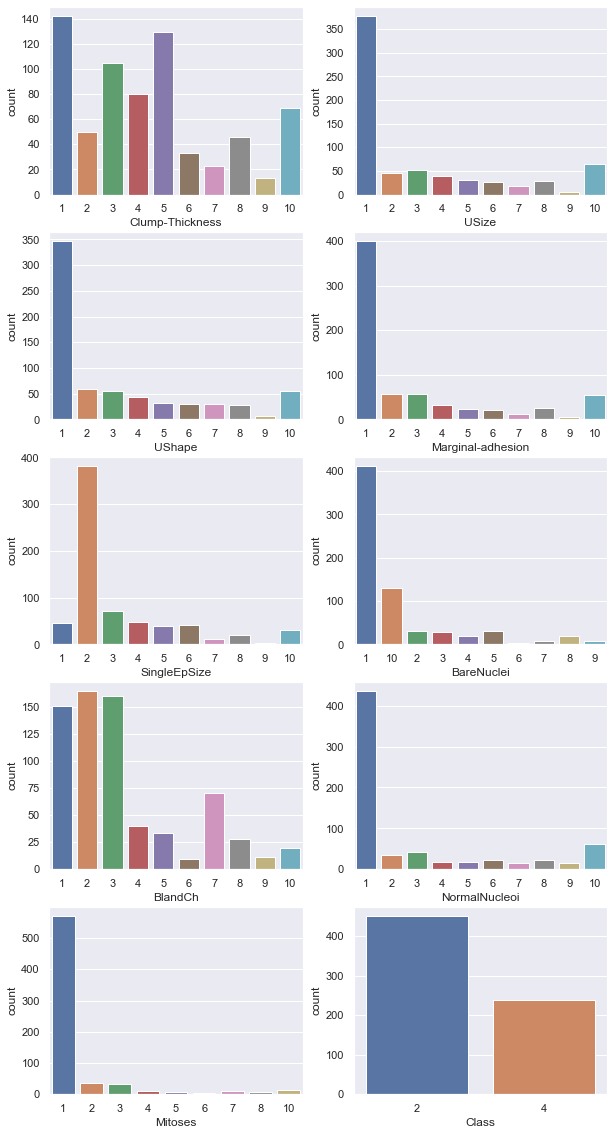

In [131]:
#1re enfoque: Hacerlo todo manual y deectar valor atipicos
#podemos apreciar el ID qu no guarda relacion con nada, pero lo dejaremos para la Feature_selection
#como los valores hacen referencia a grados, 

fig,axes=plt.subplots(5,2,figsize=(10,20 ))
for ax,column in zip(axes.flat,data.columns[1:]):
    sns.countplot(data[column],ax=ax)


#2doEnfoque: Usar pandas-profiling (Libreria que hace el analisis de forma automatica)

In [132]:
#ya habiendo analizado las clases, verificaremos las categorias de target
data['Class'].unique() 

array([2, 4], dtype=int64)

In [133]:
data['Class'].value_counts()

2    452
4    238
Name: Class, dtype: int64

In [134]:
#usariamos las metricas mas conocidas, como media, e incluso analisi de outliers. Pero observamos muchas variables discretas y no continuas
result={'Mediana':list(),
        'Moda':list()}
for column in data.columns[1:]:
    result['Mediana'].append(data[column].median())
    result['Moda'].append(data[column].mode()[0])
    
pd.DataFrame(result,index=data.columns[1:])

,Mediana,Moda
Clump-Thickness,4.0,1
USize,1.0,1
UShape,1.0,1
Marginal-adhesion,1.0,1
SingleEpSize,2.0,2
BareNuclei,1.0,1
BlandCh,3.0,2
NormalNucleoi,1.0,1
Mitoses,1.0,1
Class,2.0,2


### 3.3 Seleccion de caracteristicas
* Al tratarse de un problema de clasificacion con entradas numericas y salidas categoricas
usaremos ANOVA reflejado en f_classif

In [135]:

data['BareNuclei']=data['BareNuclei'].astype('int64') 

In [136]:
#eliminaremos los registros duplicados. Ojo si en el problema se tratn Series temporales, no se debe elimnar registros identicos
#porue afectaria al modelo, En este caso no hay relacion alguna con el tiempo
data.duplicated().sum()  

0

In [137]:
#data.drop_duplicates(inplace=True)
data=data.drop('Sample-code-number',axis=1)

In [138]:
#Transformamos las salidas categoricas 4 (maligno) a 0 y 2(Benigno) a 0) de esta manera preservamos la codificacion categorica
data=data.replace({4:1,2:0})

In [139]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Clump-Thickness    690 non-null    int64
 1   USize              690 non-null    int64
 2   UShape             690 non-null    int64
 3   Marginal-adhesion  690 non-null    int64
 4   SingleEpSize       690 non-null    int64
 5   BareNuclei         690 non-null    int64
 6   BlandCh            690 non-null    int64
 7   NormalNucleoi      690 non-null    int64
 8   Mitoses            690 non-null    int64
 9   Class              690 non-null    int64
dtypes: int64(10)
memory usage: 79.3 KB


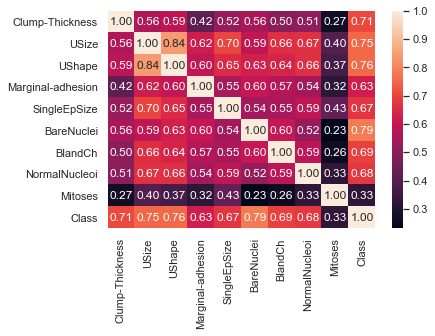

In [140]:
#veamos la correlacion de variables que funciona con variables numericas y en el caso de la regression
corr=data.corr(method='pearson')

#os resultados seran erroneos debido que no se ha hecho la seleccion adeuada para el tipo de problema adecuada
#Entradas numericas- salidas categoricas--> Problema de clasificacion: Se usara el coeficiente de correlacion de ANOVA **f_classif**
sns.heatmap(corr,annot=True,fmt='0.2f')

* podemos observar que los resultados seerian alentadores si en verdad se tratara de una regression. Por lo que las usaremos la seleccion de caracteristicas adecuadas

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [142]:
def feature_select(X,y,func=None,n='all'):
    fs=SelectKBest(score_func=func,k=n)
    fs.fit(X,y)
    columns=data.columns[:-1] 
    plt.bar(np.arange(len(columns)),fs.scores_)
    plt.xticks(np.arange(len(columns)),columns)
    plt.xlabel('Columnas')
    plt.ylabel('Score')
    return fs #retornamos el seleccionador de entidades

In [143]:
def drop_duplicated(X,y):
    #concatenamos los datos para poder identificar duplicados a nivel DataFrame
    data=pd.concat([pd.DataFrame(X),pd.Series(y)],axis=1,join='inner')
    print('Rows duplicated: {0}'.format(data.duplicated().sum()))
    data.drop_duplicates(inplace=True)
    #retornamos los datos sin duplicados
    return data.iloc[:,:-1].values,data.iloc[:,-1].values

In [144]:
#obtenemos los datos
X=data.drop('Class',axis=1).values
y=data['Class'].values

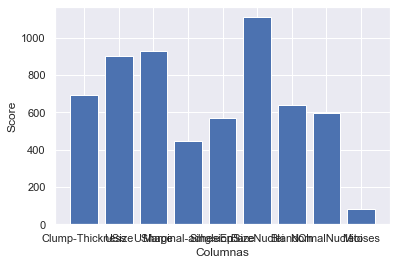

In [145]:
fs=feature_select(X,y,func=f_classif,n='all')

In [146]:
fs.scores_ 

array([ 692.03686626,  903.86091471,  931.69646715,  444.63808816,
        567.66778993, 1110.55952446,  638.35457582,  594.56207142,
         83.65208059])

* Los resultados son muy alentadores, puesto que incluso el valor mas bajo (Puntaje para 'Mitoses') tiene una relacion significativa con la variable de salida

In [147]:
#veamos que pasa cuando separamos los datos antes
from sklearn.model_selection  import train_test_split
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

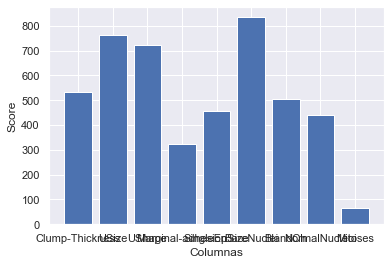

In [148]:
fs=feature_select(Xtrain,Ytrain,func=f_classif,n=8)

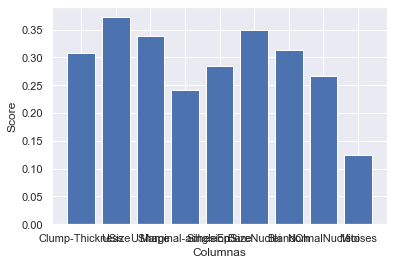

In [149]:
from sklearn.feature_selection import mutual_info_classif
fs_mutual= feature_select(Xtrain,Ytrain,func=mutual_info_classif,n='all')

In [150]:
fs.scores_

array([533.31599177, 761.30845246, 722.63425743, 322.87668131,
       455.51000484, 834.82942892, 507.13106619, 441.77958374,
        66.23576012])

In [151]:

#puntaj para ganancia mutua de informacion
fs_mutual.scores_ 

array([0.30756218, 0.37237638, 0.33820592, 0.24133938, 0.28511329,
       0.3498869 , 0.3126609 , 0.2662244 , 0.12466242])

In [152]:
#podemos ver claramente que ahora 'mitoses' es menos relevante, la dejaremos asi, para luego evaluar el rendimiento del modelo
# y si hay sobreajuste o subajuste ya tendremos a la caracteristica candidata para la eliminacion
#unas horas despues....... Verificaremos los datos
#eliminamos 'Mitoses' de los datos
#data=data.drop('Mitoses',axis=1)

In [153]:
data.duplicated().sum() 

252

In [154]:
data.drop_duplicates(inplace=True)

In [155]:
"""
X=fs.transform(X)
Xtrain=fs.transform(Xtrain)
Xtest=fs.transform(Xtest) """

'\nX=fs.transform(X)\nXtrain=fs.transform(Xtrain)\nXtest=fs.transform(Xtest) '

In [156]:
X,y=drop_duplicated(X,y)

Rows duplicated: 252


In [157]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [158]:
#Ahora balancearemos los datos.Puesto que
data['Class'].value_counts()

1    238
0    200
Name: Class, dtype: int64

In [159]:
np.bincount(Ytrain),np.bincount(Ytest) 

(array([160, 190], dtype=int64), array([40, 48], dtype=int64))

In [160]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)


In [161]:
Xtrain,Ytrain=smote.fit_sample(Xtrain,Ytrain)

In [162]:
np.bincount(Ytrain),np.bincount(Ytest)

(array([190, 190], dtype=int64), array([40, 48], dtype=int64))

### 3.4 Transformacion de datos

Una vez elejido las mejoras carateristicas se procede a:
* Codificar las Variables de entrada seleccionadas (Si existen dummies). Ojo: La variable de salida al ser categorica ya fue transformada en el proceso de seleccion de caracteristicas y en  mi opinion codificarla para hacer las prueebas correspondientes es una buena practica que suelo hacer a menudo.
* Escalar variables 

In [48]:
#Antes solia hacer el escalado, pero es mejor hacerlo con Pipelines, en el que los escalo antes de entrenarlos

### Seleccion del modelo

* Haremos un Test con el mejor modelo sobre todos los datos, comparandolos de forma equitativa

### 3.1 Elejir el mejor modelo

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

In [164]:
names_model=['Logistic','DecisionTree','RandomForest','SupportVector','KNN']
list_model=[LogisticRegression(solver='lbfgs',class_weight='balanced'),
            DecisionTreeClassifier(class_weight='balanced'),
            RandomForestClassifier(class_weight='balanced'),
            SVC(class_weight='balanced'),
            KNeighborsClassifier()
            
           ]


In [165]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
#la seleccion del modelo se hace con todos los datos, tanto de entrenamiento como de Prueba
kfold=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [166]:
def select_best_model(names_model,list_model,scoring=('accuracy'),X=0,y=0,cv=0):
    results={score:{'train':[],
                    'test':[]
                   } for score in scoring}
    for name,model in zip(names_model,list_model):
        pipe_model=make_pipeline(StandardScaler(),model)

        scores=cross_validate(pipe_model,X ,y,
                              cv=cv,
                              scoring=scoring,
                              n_jobs=-1,
                              return_train_score=True,
                             )
        scores=pd.DataFrame(scores)
        #print(scores.head())
        for score in scoring:
            for site,sc in zip(['train','test'],[score,score]):
                results[score][site].append(scores[site+'_'+sc].mean())
        print("{0} Analizado.. Ok".format(name))
    
    rs={key: pd.DataFrame(v,index=names_model) for key,v in results.items()}
    return pd.concat(rs,axis=1)


In [167]:
data_score=select_best_model(names_model,list_model,scoring=('accuracy','f1'),X=X,y=y,cv=kfold)

Logistic Analizado.. Ok
DecisionTree Analizado.. Ok
RandomForest Analizado.. Ok
SupportVector Analizado.. Ok
KNN Analizado.. Ok


In [168]:
data_score

accuracy                  f1          
                  train      test     train      test
Logistic       0.954592  0.952114  0.957746  0.954434
DecisionTree   1.000000  0.892812  1.000000  0.899913
RandomForest   1.000000  0.931607  1.000000  0.937494
SupportVector  0.961441  0.940751  0.964363  0.944642
KNN            0.954592  0.940645  0.957891  0.943680

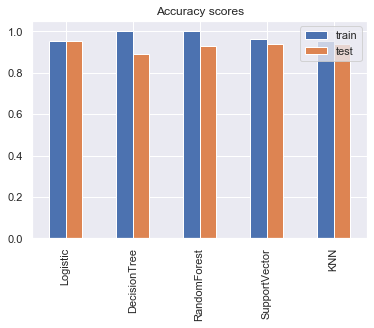

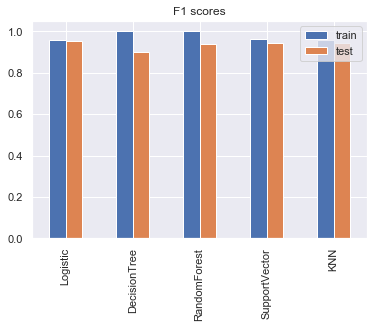

In [169]:
data_score['accuracy'].plot(kind='bar',title='Accuracy scores')
data_score['f1'].plot(kind='bar',title='F1 scores')

* De los graficos anteriores podemos deducir que por cada metrica y conjunto de datos independiente. Tenemos un margen de sobreajuste a los datos .

* La razon por la que elejimos la metrica **'F1'** es porque es maz veraz en los resultados que **'accuracy'**, es porque nuestro conjunto de datos presenta datos desbalanceados.
* Entonces tomando en cuenta el mejor puntaje en la **F1**,( sin dejar de lado el **accuracy**), la mejor puntuacion la posee **Logistic Regression**, seguido de **Support Vector Classifier**

### 3.2 Ajustar el modelo
* Esta parte consta de ajustar los hiperparametros del modelo
* Validaciones cruzadas para el conjunto de Train y Validacion (Implicita)
* El conjunto de Testeo debe estar excluido de los resltado de entrenamiento

In [195]:
from sklearn.pipeline import Pipeline 
model=Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('svc',SVC(class_weight='balanced',kernel='rbf'))
])

In [171]:
#ahora veamos el comportamiento del modelo en el conjunto de entrenamiento que es el que se utilizara de apartir en adelante
def cross_validation(model,X=None,y=None,scoring=tuple(),cv=None):

    scores=cross_validate(model,X,y,
                              cv=cv,
                              scoring=scoring,
                              n_jobs=-1,
                              return_train_score=True,
                             )
    score_mean=pd.DataFrame(scores).mean(axis=0)
    score_std=pd.DataFrame(scores).std(axis=0)
    scores=pd.concat([score_mean,score_std],axis=1,keys=['Mean','Std'])
    
    print(scores)

In [196]:
cross_validation(model,Xtrain,Ytrain,scoring=('accuracy','f1'),cv=kfold)

                    Mean       Std
fit_time        0.018669  0.013519
score_time      0.008388  0.008488
test_accuracy   0.947368  0.024811
train_accuracy  0.960526  0.004192
test_f1         0.947778  0.023744
train_f1        0.960287  0.004163


In [73]:
#vemos que esta sobreajustado un poco asi que lo solucionaremos
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [173]:
def tuning_parameters(model,param_grid,scoring='accuracy',cv=7,X=None,y=None): 
    grid=GridSearchCV(estimator=model,
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=kfold,
                      n_jobs=-1,
                      verbose=2
                     )
    grid.fit(X,y);
    print("Best Parameters: {0}".format(grid.best_params_))
    print("Best score:      {0}".format(grid.best_score_))
    
    return grid

In [197]:
param_grid=dict(svc__C=10**np.arange(6),
                svc__gamma=[0.000001,0.00001,0.0001,0.001,0.01,0.01]
               )
grid=tuning_parameters(model,param_grid,scoring='accuracy',cv=kfold,X=Xtrain,y=Ytrain)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    2.0s


Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01}
Best score:      0.9447368421052632


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    6.3s finished


In [198]:
model=grid.best_estimator_ 

In [199]:
cross_validation(model,Xtrain,Ytrain,scoring=('accuracy','f1'),cv=kfold)

                    Mean       Std
fit_time        0.016472  0.007159
score_time      0.007989  0.000942
test_accuracy   0.944737  0.026169
train_accuracy  0.955556  0.002687
test_f1         0.943976  0.025715
train_f1        0.954995  0.002860


In [95]:
from sklearn.model_selection import validation_curve


In [108]:
def validation_parameter(model,X,y,param_name,param_range,cv=7):
    
    train_score,test_score=validation_curve(model,X,y,
                                       param_name=param_name,
                                        param_range=param_range,
                                        cv=cv,
                                        n_jobs=-1
                                       )
    train_mean=train_score.mean(axis=1)
    train_std=train_score.std(axis=1)

    test_mean=test_score.mean(axis=1)
    test_std=test_score.std(axis=1)

    plt.plot(param_range,train_mean,'-b',label='Train')
    plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.3)

    plt.plot(param_range,test_mean,'-r',label='Test')
    plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.3)
    plt.legend(loc='best')
    

### 3.3 Validacion del modelo final
* A esta fase se llega solo si se logra obtener un equilibrio entre el sobreajuste ysubajuste de datos

In [206]:
# LogisticRegression: 96.590909% de precision | 97% de F1 -> Sin sobre/sub ajuste
# RandomForest : 95.4545% de precision | 95% de F1
#SVC: 95.5% precision |  97% F1


In [200]:
model.fit(Xtrain,Ytrain);

In [201]:
Ypred=model.predict(Xtest)

In [180]:
from sklearn.metrics import classification_report,accuracy_score

In [202]:
accuracy_score(Ytest,Ypred)

0.9659090909090909

In [204]:
print(classification_report(Ytest,Ypred,target_names=['benign','malign']))

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96        40
      malign       0.98      0.96      0.97        48

    accuracy                           0.97        88
   macro avg       0.96      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



In [183]:
from sklearn.metrics import confusion_matrix

[[39  1]
 [ 2 46]]


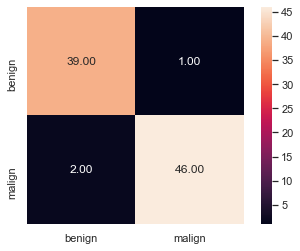

In [205]:
labels=['benign','malign']
conf=confusion_matrix(Ytest,Ypred)
print(conf)
sns.heatmap(conf,annot=True,fmt='.2f',xticklabels=labels,yticklabels=labels,square=True)

In [186]:
#est es increible podemos notar resultados muy prometedores para la solucion de nuestro problema. 
#Ya existe un equilibrio entre sesgo y varianza. ...Pero nos damos cuenta de algo. Los valores duplicados en el datset
#por lo tanto procedemos a guardar el modelo
import joblib


In [207]:
joblib.dump(model,'breast_cancerSupportVectorV0.1.pkl')

['breast_cancerSupportVectorV0.1.pkl']

In [208]:
#mañana continuamos con la implementacion del mejor modelo, puesto que echamos de menos los duplicacdos
#con la elimnacion de los duplicados obtuvimos datos mas sinceros debidoa que a la precesnia de duplicados cierta proporcion se destinaba
#al los datos de entreamiento y a otra a la de Test, lo que impedi un poco al enfrentarse a datos reales

## Stacking de modelos ML
* Una vez seleccionado obtenido y entrenado los mejores modelos, entonces procederemos a hacer un Stacking de apilamiento de modelo, si jay mejoras combinando los modelos, nos uedamos con el Satacking y si por el contrario hay yn clasificador que lo hace mejor que este, entonnces, lo escogemos a él por su simplicidad

In [209]:
import sklearn

sklearn.__version__

'0.22.1'

In [210]:
def cargar_modelos():
    randomForest=joblib.load('breast_cancerRandomForestV0.1.pkl')
    logistic=joblib.load('breast_cancerLogisticRegressionV0.3.pkl') 
    supportVector= joblib.load('breast_cancerSupportVectorV0.1.pkl')
    kneighbors=joblib.load('breast_cancerKNeighborsV0.1.pkl')
    
    return [randomForest,logistic,supportVector,kneighbors]

In [211]:
names_models=['RandomForest','LogisticRegression','SupportVector','Kneighbors']

In [212]:
list_models=cargar_modelos()
base_learners=[(name,model.steps[1][1]) for name,model in zip(names_models[:-1],list_models[:-1])]
base_learners.append((names_models[-1],list_models[-1]))

In [214]:
from sklearn.ensemble import StackingClassifier
stacking=StackingClassifier(estimators=base_learners,
                            final_estimator=LogisticRegression(class_weight='balanced'),
                            cv=kfold,
                            n_jobs=-1
                           )

In [215]:
list_models.append(stacking)
names_models.append('StackingClassifier')

In [216]:
df=select_best_model(names_models,list_models,scoring=('accuracy','f1'),X=X,y=y,cv=kfold)

RandomForest Analizado.. Ok
LogisticRegression Analizado.. Ok
SupportVector Analizado.. Ok
Kneighbors Analizado.. Ok
StackingClassifier Analizado.. Ok


In [217]:
df  

accuracy                  f1          
                       train      test     train      test
RandomForest        0.954847  0.945296  0.958307  0.948905
LogisticRegression  0.954592  0.952114  0.957746  0.954434
SupportVector       0.955099  0.945296  0.958300  0.948372
Kneighbors          0.954592  0.940645  0.957891  0.943680
StackingClassifier  0.955607  0.947569  0.958729  0.950254

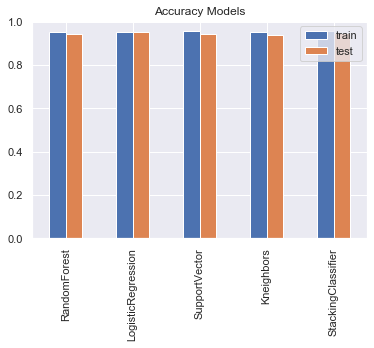

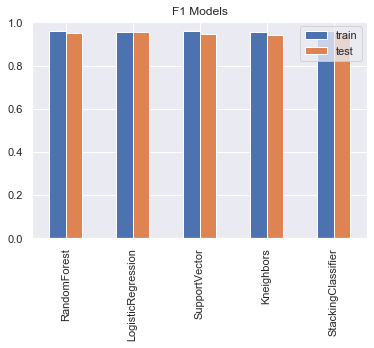

In [218]:
df['accuracy'].plot(kind='bar',title='Accuracy Models')
df['f1'].plot(kind='bar',title='F1 Models')

* Podemos observar que el modelo de ensamblado no logro superar a **Logistic Regression** sobre los demas modelos por lo tanto, nos quedamos con este ultimo como modelo final listo para produccion. En todo caso hemos guardado el resto de modelos por presentar puntajes similares

In [219]:
best_model=list_models[1]

In [220]:
joblib.dump(best_model,'BestModel_breastCancer.pkl')

['BestModel_breastCancer.pkl']

* En conclucion desde mi punto de vista, el proyecto a concluido y ahora podemos hacer uso de **BestModel_breastCancer.pkl** como el mejor modelo a usar, listo para produccion.